# Домашнее задание. Титаник
В этом домашнем задании вам предлагается решить задачу предсказания выживших пассажиров Титаника. Эту задачу машинного обучения рано или поздно решает, наверное, любой, кто обучается анализу данных. Информация о датасете доступна по <a href=https://www.kaggle.com/c/titanic.>ссылке</a>.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Загрузка данных

Загрузим датасет Titanic из приложенных файлов. В первом файле находится информация о пассажирах, во втором -- информация о том, выжил пассажир или нет.

Если вы запускаете ноутбук на Google Colab, самым простым способом загрузить данные в ноутбук будет примонтировать к Colab ваш Google Drive. Для этого сначала положите в свою корневую директорию Google Drive  файлы, приложенные к этому ноутбуку, а затем выполните три закоментированные строчки в клетке ниже. <a href=https://www.machinelearningmastery.ru/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166/>Подробная инструкция по работе с Google Drive + Google Colab</a>

Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

Name — имя;

Sex — пол;

Age — возраст;

SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

Parch — количество родителей, детей (в том числе приемных) на борту титаника;

Ticket — номер билета;

Fare — плата за проезд;

Cabin — каюта;

Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

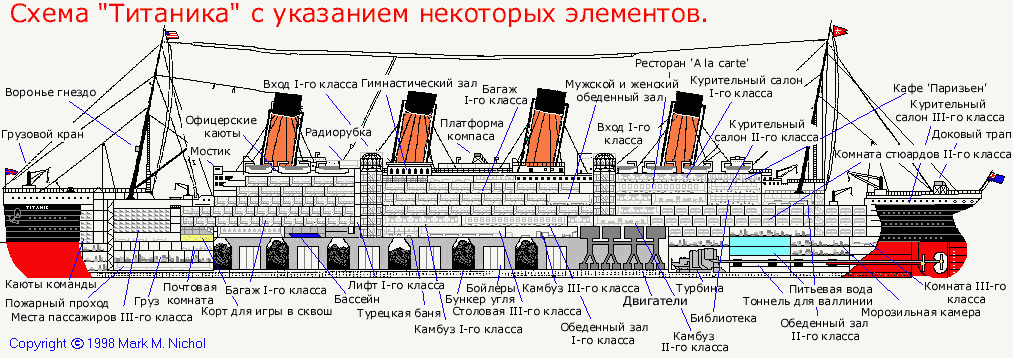

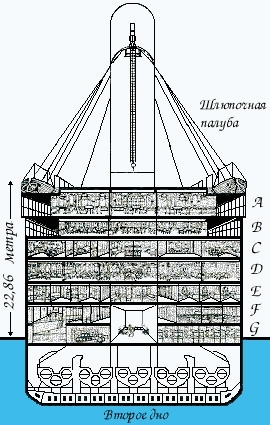

Титаник являлся британским кораблем, а согласно законам Британии на корабле должно было быть число шлюпок, соответствующее водоизмещению судна, а не пассажировместимости. Титаник формально соответствовал этим требованиям и имел 20 шлюпок (14 со вместимостью 65 человек, 2 — 40 человек, 4 — 47 человек), которые были рассчитаны на погрузку 1178 человек, всего же на Титанике было 2208 человек. Таким образом, зная, что шлюпок на всех не хватит, капитан Титаника Смит отдал, после столкновения с айсбергом, приказ брать на шлюпки только женщин и детей. Однако члены команды не всегда следовали ему.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [3]:
titanic_data = pd.read_csv('/content/gdrive/My Drive/homework_module_1/titanic_data.csv', index_col='PassengerId')

In [4]:
basic_features = titanic_data.columns

y_survived = pd.read_csv('/content/gdrive/My Drive/homework_module_1/titanic_surv.csv')
y_survived.index = titanic_data.index

print(f'Всего {len(titanic_data)} пассажиров в выборке')
titanic_data.head()

Всего 891 пассажиров в выборке


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
y_survived.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [6]:
titanic_data = titanic_data.join(y_survived)
# объединенные
titanic_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [7]:
sorted_data = titanic_data.sort_values('Pclass').head()
sorted_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
446,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S,1
311,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C,1
310,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,1
308,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C,1
307,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C,1


## Исследование датасета

### Задание 1 (1 балл)
Опишите датасет. Сколько в нём мужчин, сколько женщин? Посчитайте распределение по классам пассажиров. Используйте функцию ``pd.Series.value_counts``. <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html>Пример использования</a>

Посчитайте долю выживших мужчин к общему количеству мужчин, а также женщин к общему количеству женщин. Сделайте выводы. 
Проведите схожую аналитику по возрасту выживших и по классу выживших. 

Вам поможет функция ``plt.hist()``. <a href=https://matplotlib.org/3.3.1/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py> Пример использования </a> 

Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

Name — имя;

Sex — пол;

Age — возраст;

SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

Parch — количество родителей, детей (в том числе приемных) на борту титаника;

Ticket — номер билета;

Fare — плата за проезд;

Cabin — каюта;

Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

In [8]:
Pclass = pd.Series((titanic_data.Pclass)).value_counts()
Pclass

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
Name = pd.Series((titanic_data.Name)).value_counts()
Name.head(10)

Moraweck, Dr. Ernest                        1
Nicola-Yarred, Miss. Jamila                 1
Coxon, Mr. Daniel                           1
Leeni, Mr. Fahim ("Philip Zenni")           1
Kelly, Miss. Anna Katherine "Annie Kate"    1
Parrish, Mrs. (Lutie Davis)                 1
Ayoub, Miss. Banoura                        1
Hart, Mr. Benjamin                          1
Hodges, Mr. Henry Price                     1
Osen, Mr. Olaf Elon                         1
Name: Name, dtype: int64

категории - Mr. Mrs. Miss. Master. ...
нет повторяющихся имен

In [10]:
Sex = pd.Series((titanic_data.Sex)).value_counts()
Sex

male      577
female    314
Name: Sex, dtype: int64

сколько из них детей?

In [11]:
Age = pd.Series((titanic_data.Age)).value_counts()
Age

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [12]:
SibSp = pd.Series((titanic_data.SibSp)).value_counts()
SibSp

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

категории сколько родственников на борту

In [13]:
Parch = pd.Series((titanic_data.Parch)).value_counts()
Parch

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

количество родителей, детей

In [14]:
Ticket = pd.Series((titanic_data.Ticket)).value_counts()
Ticket

CA. 2343             7
1601                 7
347082               7
CA 2144              6
3101295              6
                    ..
65303                1
323592               1
2003                 1
113503               1
STON/O 2. 3101273    1
Name: Ticket, Length: 681, dtype: int64

билеты по категориям? есть повторяющиеся, но их не много, много людей с неопознанными билетами 891-681

значит потребуется заполнить нулями эти категории, возможно все они мертвы?

In [15]:
Fare = pd.Series((titanic_data.Fare)).value_counts()
Fare

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

зависит ли цена от билета или от порта откуда выезжает пассажир?

In [16]:
Cabin = pd.Series((titanic_data.Cabin)).value_counts()
Cabin

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
D              3
              ..
D56            1
A20            1
D46            1
B82 B84        1
T              1
Name: Cabin, Length: 147, dtype: int64

у многих не заполнены каюты, зависит ли каюта от цены?

In [17]:
Embarked = pd.Series((titanic_data.Embarked)).value_counts()
Embarked

S    644
C    168
Q     77
Name: Embarked, dtype: int64

порт посадки? коррелирован ли с ценой?

In [18]:
Survived = pd.Series((titanic_data.Survived)).value_counts()
Survived

0    549
1    342
Name: Survived, dtype: int64

погибло больше, чем спаслось

##Диаграммное представление

**Pclass**

Показывает класс, которым следовал пассажир.
Третий класс имел наибольшее количество пассажиров, затем 2 класс и класс 1. В третьем классе пассажиров больше, чем в первом и втором классе вместе взятых. В итоге в первом классе меньше людей и вероятность выживания выше.

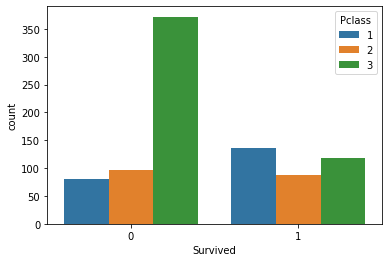

In [19]:
sns.countplot(x='Survived',data=titanic_data,hue='Pclass')

**Sex**



In [20]:
Sex = pd.Series((titanic_data.Sex)).value_counts(1)
Sex

male      0.647587
female    0.352413
Name: Sex, dtype: float64

Примерно 65% пассажиров - мужчины, 35% - женщины. Процент выживших женщин выше, чем процент выживших мужчин. Это объяснено скорее всего тем, какая категория людей шла в приотритет на шлюпки (женщины,дети)

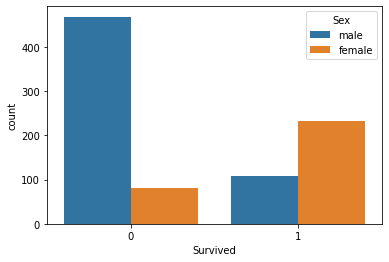

In [21]:
sns.countplot(x='Survived',data=titanic_data,hue='Sex')

**Age**

Самый молодой пассажир - меньше полугода. Самый старший - 80 лет. Средний возраст пассажиров - чуть менее 30 лет.

In [22]:
titanic_data.Age.min()

0.42

In [23]:
titanic_data.Age.max()

80.0

In [24]:
titanic_data.Age.mean()

29.69911764705882

Можно разделить возрастную группу 0-10, 10-20, 20-30, 30-40, 40-50, 50-60, 60-70, 70-80

In [25]:
titanic_data['Age_Category'] = pd.cut(titanic_data['Age'], bins=[0,10,20,30,40,50,60,70,80], labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'])

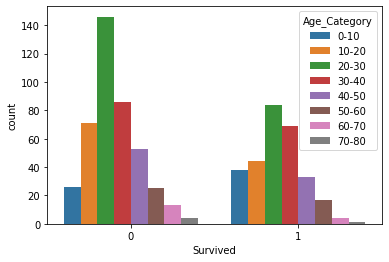

In [26]:
sns.countplot(x='Survived',data=titanic_data,hue='Age_Category')

Большая часть детей в возрасте до 10 лет выжила. В других возрастных группах число жертв выше, чем число выживших. В категории 20-30 лет погибло более 140 в сравнении с примерно 80 выжившими того же возраста, большая разница в сравнении с другими группами.

**SibSp**

Число братьев, сестер или супругов на борту у человека. Максимум 8 братьев и сестер путешествовали вместе с одним из путешественников. Более 90% людей путешествовали в одиночку или с одним из своих братьев/сестер или с супругом/супругой. Шансы на выживание резко падали, если кто-то ездил с более чем двумя родными. Возможно это связано с тем, что люди долго искали всех членов семьи и не влезали в одну шлюпку.

In [27]:
SibSp = pd.Series((titanic_data.SibSp)).value_counts(1)
SibSp

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

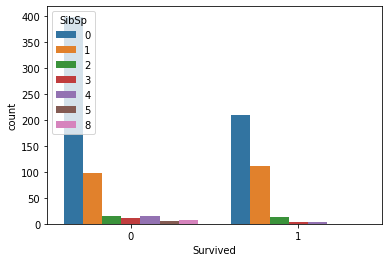

In [28]:
sns.countplot(x='Survived',data=titanic_data,hue='SibSp')

**Parch**

Аналогичем SibSp - признак содержит количество родителей или детей, с которыми путешествовал каждый пассажир. Максимум 6 родителей/детей путешествовали с одним из пассажиров.

In [29]:
titanic_data.Parch.max()

6

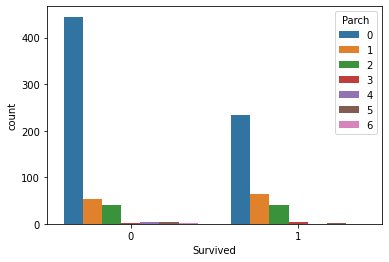

In [30]:
sns.countplot(x='Survived',data=titanic_data,hue='Parch')

Для удобства можно объединить значения **Parch** и **SibSp** в столбец **Family**

In [31]:
titanic_data['Family'] = titanic_data.Parch + titanic_data.SibSp

Шансы на выживание выше, если путешественник путешествует один. Создадим ещё один столбец **Alone** и приствоить значение True, если значение в столбце **Family** было 0

In [32]:
titanic_data['Alone'] = titanic_data.Family == 0 

**Fare**

Стоимость билета. Для удобства требуется разделить на категории суммы тарифа.

In [33]:
titanic_data.Fare.min()

0.0

In [34]:
titanic_data.Fare.max()

512.3292

In [35]:
titanic_data.Fare.mean()

32.2042079685746

In [36]:
titanic_data['Fare_Category'] = pd.cut(titanic_data['Fare'], bins=[0,8.2,17.4,32.2,120], labels=['Low','Mid','High_Mid','High'])

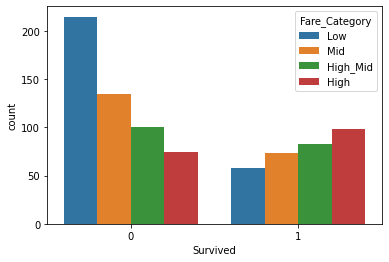

In [37]:
sns.countplot(x='Survived',data=titanic_data,hue='Fare_Category')

В итоге чем больше заплатит пассажир, тем выше его шансы на выживание. Также может объясняться расположением кают. Билет дороже - каюты выше.

**Embarked**

Порт посадки пассажиров.
S - Саутгемптон
C - Шербург
Q - Куинстаун


In [38]:
Embarked = pd.Series((titanic_data.Embarked)).value_counts(1)
Embarked

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

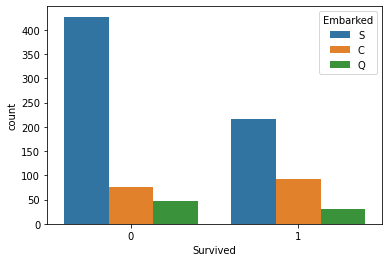

In [39]:
sns.countplot(x='Survived',data=titanic_data,hue='Embarked')

Более 70% людей сели в порту Саутгемптон. Чуть менее 20% сели на борт из Шербура, а остальные из Квинстауна. По диаграмме видно, что люди, которые сели в порте Шербург, имели более высокие шансы на выживание, чем люди, которые сели в портах Саутгмптон или Квинстаун.

## Заполнение пропусков в данных


Добавленные столбцы

Face_Category и Age_Category


In [40]:
titanic_data.columns[titanic_data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked', 'Age_Category', 'Fare_Category']

Text(0.5, 1.0, 'Missing values heatmap')

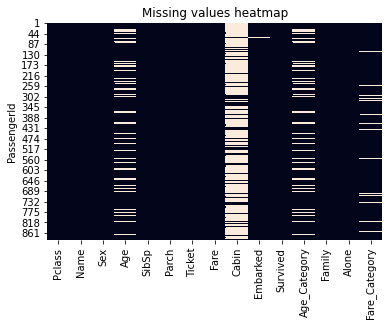

In [41]:
titanic_data.isnull().sum()
sns.heatmap(titanic_data.isnull(), cbar = False).set_title("Missing values heatmap")

Для простоты заполним все пропуски в категориальных колонках новым классом "0", а в числовой колонке Age --- медианным значением. 

In [ ]:
data.loc[:, ['Cabin', 'Embarked']] = data.loc[:, ['Cabin', 'Embarked']].fillna('0')
data['Age'] = data['Age'].fillna(data['Age'].median())

##Заполнение пропущенных данных

У **Embarked** не много пропущенных значений. Вспомним, что наибольшее количество пассажиров отправлялось из Саутгемптона, то вероятность посадки именно в этом порту соответственно выше, поэтому заполним недостающи имеенно Саутгемптоном.
Чтобы не вводить название порта вручную, найдем моду данного столбца и подставим в него отсутствующее значение.

In [43]:
titanic_data.Embarked.fillna(titanic_data.Embarked.mode()[0],inplace = True)

**Cabin** было много пропущенных данных. Заполним новым классом - отдельным классом. И назовем NaN

In [44]:
titanic_data.Cabin = titanic_data.Cabin.fillna('NaN')

**Age** возраст имеет тоже большое количество пропусков. Чтобы заполнить данные, можно действовать следующим образом: классифицировать людей на основе их имени, т.е. выделить префиксы для обращений из каждого имени.

In [45]:
titanic_data['Salutation'] = titanic_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [46]:
titanic_data.Salutation.head(10)

PassengerId
1         Mr
2        Mrs
3       Miss
4        Mrs
5         Mr
6         Mr
7         Mr
8     Master
9        Mrs
10       Mrs
Name: Salutation, dtype: object

In [47]:
grp = titanic_data.groupby(['Sex','Pclass'])

Заполним **Age** медианным значением

In [48]:
titanic_data[['Age','Salutation']].head(40)

,Age,Salutation
PassengerId,,
1,22.0,Mr
2,38.0,Mrs
3,26.0,Miss
4,35.0,Mrs
5,35.0,Mr
6,NaN,Mr
7,54.0,Mr
8,2.0,Master
9,27.0,Mrs


In [49]:
titanic_data.Age.median()

28.0

Для простоты заполним медианным значением категорию возраст

In [50]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

In [51]:
titanic_data[['Sex','Age','Salutation']].head(10)

,Sex,Age,Salutation
PassengerId,,,
1,male,22.0,Mr
2,female,38.0,Mrs
3,female,26.0,Miss
4,female,35.0,Mrs
5,male,35.0,Mr
6,male,28.0,Mr
7,male,54.0,Mr
8,male,2.0,Master
9,female,27.0,Mrs


## Подготовка плана тестирования

### Задание 2. (0 баллов)
Разделите выборку на обучающее и тестовое множество в соотношении 70:30.

In [52]:
from sklearn.model_selection import train_test_split
titanic_data_train, titanic_data_test = train_test_split(titanic_data, test_size=0.3)

In [53]:
titanic_data_train.shape
# 70%

(623, 16)

In [54]:
titanic_data_test.shape
# 30%

(268, 16)

## Выделение новых признаков
Теперь отложим тестовые данные и приступим к моделированию. Внимательно изучите данные. Можете ли вы выделить признаки, которые не указаны явно в таблице?

### Задание 3 (1 балл)
 Сформируйте по крайней мере один новый признак и объясните ваш выбор. Пример признака сформирован за вас. 

Указания: 
- Пассажиров можно поделить на несколько классов по их именам.
- Различных номеров кают слишком много. Но буквы в номерах кают указывают на их местоположение. (***Этот признак сформирован в примере***)
- Возможно, имеет смысл отделить мальчиков от мужчин. Отделять девочек от женщин может быть не так важно
- Другие идеи для признаков можно почерпнуть на форуме в обсуждении задачи на kaggle.com.

In [55]:
titanic_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_Category,Family,Alone,Fare_Category,Salutation
PassengerId,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,20-30,1,False,Low,Mr
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,30-40,1,False,High,Mrs
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,20-30,0,True,Low,Miss
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,30-40,1,False,High,Mrs
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,30-40,0,True,Low,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,20-30,0,True,Mid,Rev
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,10-20,0,True,High_Mid,Miss
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,NaN,3,False,High_Mid,Miss


In [56]:
titanic_data['Cabin']

PassengerId
1       NaN
2       C85
3       NaN
4      C123
5       NaN
       ... 
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 891, dtype: object

In [57]:
def get_cabin_letter(row):
    return row['Cabin'][0]

titanic_data_train['cabin_type'] = titanic_data.apply(get_cabin_letter, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [58]:
titanic_data_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_Category,Family,Alone,Fare_Category,Salutation,cabin_type
PassengerId,,,,,,,,,,,,,,,,,
534,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,28.0,0,2,2668,22.3583,NaN,C,1,NaN,2,False,High_Mid,Mrs,N
583,2,"Downton, Mr. William James",male,54.0,0,0,28403,26.0000,NaN,S,0,50-60,0,True,High_Mid,Mr,N
351,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.2250,NaN,S,0,20-30,0,True,Mid,Mr,N
725,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.1000,E8,S,1,20-30,1,False,High,Mr,E
869,3,"van Melkebeke, Mr. Philemon",male,28.0,0,0,345777,9.5000,NaN,S,0,NaN,0,True,Mid,Mr,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,S,1,60-70,0,True,High,Mrs,B
279,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q,0,0-10,5,False,High_Mid,Master,N
12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,50-60,0,True,High_Mid,Miss,C


Разделение кают на их номера, указывают на местоположение

1. Уже разделили на возрастные категории - осталось их раскатегорировать
2. Следует раскатегорировать по цене - ввести категории и обработать one_hot_encoding
3. Отделить детей? В отдельную категорию в Sex?
4. В отдельные категории вбить имена?
5. Связана ли цена с портом? Объединить?
6. Кабину с классом?

Сюда добавьте описание вашего нового признака

In [ ]:
def compute_my_feature(row): #rename this function appropriately
    return <YOUR CODE>

data_full[<NEW FEATURE NAME>] = <YOUR CODE> 

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,cabin_type
PassengerId,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0,0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,B
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,0,S,0,0


## Кодирование категориальных признаков и обработка данных
Все признаки сейчас делятся на числовые, бинарные, категориальные и текстовые. К текстовым признакам можно отнести имя пассажира, номер билета и номер каюты: значения этих признаков уникальны почти для всех пассажиров, и простого способа использовать их в модели не существует.

### Задание 4 (0 баллов)
Пока используя только изначальные признаки, перекодируйте категориальные признаки функцией ``pd.get_dummies``. Естественно, имена пассажиров и номера билетов и кают кодировать не стоит, поскольку все значения этих признаков уникальные. 

In [59]:
titanic_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_Category,Family,Alone,Fare_Category,Salutation
PassengerId,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,20-30,1,False,Low,Mr
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,30-40,1,False,High,Mrs
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,20-30,0,True,Low,Miss
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,30-40,1,False,High,Mrs
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,30-40,0,True,Low,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,20-30,0,True,Mid,Rev
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,10-20,0,True,High_Mid,Miss
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,NaN,3,False,High_Mid,Miss


In [60]:
from sklearn.preprocessing import LabelEncoder

In [66]:
# пол человека
titanic_data['Sex'] = LabelEncoder().fit_transform(titanic_data['Sex'])
# male - 1
# female - 0

In [67]:
titanic_data['Alone'] = LabelEncoder().fit_transform(titanic_data['Alone'])
# 0 - не один
# 1 - путешественник один

In [75]:
td = pd.concat([titanic_data, pd.get_dummies(titanic_data.Age_Category, prefix="AC", drop_first = False),pd.get_dummies(titanic_data.Embarked, prefix="Emb", drop_first = False),pd.get_dummies(titanic_data.Salutation, prefix="Name", drop_first = False),pd.get_dummies(titanic_data.Family, prefix="F", drop_first = False),pd.get_dummies(titanic_data.Pclass, prefix="Class", drop_first = False)],axis=1)

In [72]:
# возрастные категории
pd.get_dummies(titanic_data.Age_Category, prefix="AC", drop_first = False)

,AC_0-10,AC_10-20,AC_20-30,AC_30-40,AC_40-50,AC_50-60,AC_60-70,AC_70-80
PassengerId,,,,,,,,
1,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0
5,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
887,0,0,1,0,0,0,0,0
888,0,1,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0


In [73]:
# порт отбытия
pd.get_dummies(titanic_data.Embarked, prefix="Emb", drop_first = False)

,Emb_C,Emb_Q,Emb_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
887,0,0,1
888,0,0,1
889,0,0,1


In [77]:
# цена за билет
pd.get_dummies(titanic_data.Fare_Category, prefix="Fare", drop_first = False)

,Fare_Low,Fare_Mid,Fare_High_Mid,Fare_High
PassengerId,,,,
1,1,0,0,0
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1
5,1,0,0,0
...,...,...,...,...
887,0,1,0,0
888,0,0,1,0
889,0,0,1,0


In [78]:
# имена 
pd.get_dummies(titanic_data.Salutation, prefix="Name", drop_first = False)

,Name_Capt,Name_Col,Name_Don,Name_Dr,Name_Jonkheer,Name_Lady,Name_Major,Name_Master,Name_Miss,Name_Mlle,Name_Mme,Name_Mr,Name_Mrs,Name_Ms,Name_Rev,Name_Sir,Name_the Countess
PassengerId,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
888,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [79]:
# семья
pd.get_dummies(titanic_data.Family, prefix="F", drop_first = False)

,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_10
PassengerId,,,,,,,,,
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
887,1,0,0,0,0,0,0,0,0
888,1,0,0,0,0,0,0,0,0
889,0,0,0,1,0,0,0,0,0


In [80]:
# класс
pd.get_dummies(titanic_data.Pclass, prefix="Class", drop_first = False)

,Class_1,Class_2,Class_3
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
5,0,0,1
...,...,...,...
887,0,1,0
888,1,0,0
889,0,0,1


In [70]:
td

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_Category,Family,Alone,Fare_Category,Salutation,AC_0-10,AC_10-20,AC_20-30,AC_30-40,AC_40-50,AC_50-60,AC_60-70,AC_70-80,Emb_C,Emb_Q,Emb_S,Name_Capt,Name_Col,Name_Don,Name_Dr,Name_Jonkheer,Name_Lady,Name_Major,Name_Master,Name_Miss,Name_Mlle,Name_Mme,Name_Mr,Name_Mrs,Name_Ms,Name_Rev,Name_Sir,Name_the Countess,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_10,Class_1,Class_2,Class_3
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,20-30,1,0,Low,Mr,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,30-40,1,0,High,Mrs,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,20-30,0,1,Low,Miss,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,30-40,1,0,High,Mrs,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,30-40,0,1,Low,Mr,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,0,20-30,0,1,Mid,Rev,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
888,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,1,10-20,0,1,High_Mid,Miss,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,NaN,3,0,High_Mid,Miss,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


Удаление колонок - отбросим столбцы, которые не нужны для прогнозирования

In [76]:
td.drop(['Pclass','Fare','Cabin','Fare_Category','Name','Salutation','Ticket','Embarked','Age_Category','SibSp','Parch','Age','Family'],axis=1,inplace=True)

In [77]:
td

,Sex,Survived,Alone,AC_0-10,AC_10-20,AC_20-30,AC_30-40,AC_40-50,AC_50-60,AC_60-70,AC_70-80,Emb_C,Emb_Q,Emb_S,Name_Capt,Name_Col,Name_Don,Name_Dr,Name_Jonkheer,Name_Lady,Name_Major,Name_Master,Name_Miss,Name_Mlle,Name_Mme,Name_Mr,Name_Mrs,Name_Ms,Name_Rev,Name_Sir,Name_the Countess,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_10,Class_1,Class_2,Class_3
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
888,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
889,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


Раскатегорировали все данные, теперь требуется разделить эти данные на обучающую и тестовую выборки

In [78]:
td_train, td_test = train_test_split(td, test_size=0.3)

In [84]:
train_data = td

In [85]:
feature_train = train_data['Survived']
label_train = train_data.drop(['Survived'], axis = 1)

In [86]:
feature_train

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [87]:
label_train

,Sex,Alone,AC_0-10,AC_10-20,AC_20-30,AC_30-40,AC_40-50,AC_50-60,AC_60-70,AC_70-80,Emb_C,Emb_Q,Emb_S,Name_Capt,Name_Col,Name_Don,Name_Dr,Name_Jonkheer,Name_Lady,Name_Major,Name_Master,Name_Miss,Name_Mlle,Name_Mme,Name_Mr,Name_Mrs,Name_Ms,Name_Rev,Name_Sir,Name_the Countess,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_10,Class_1,Class_2,Class_3
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
888,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
889,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [130]:
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.3)

## Обучение baseline-модели

### Задание 5 (1 балл)

Обучите одну из простых известных вам моделей. Измерьте качество полученной модели на кросс-валидации (используйте только обучающую выборку!)

## Метод ближайших соседей

Импортируем и обучим модель K ближайших соседей

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
model_KNC = KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)

In [110]:
print(x_train.shape)
print(x_test.shape)

(623, 42)
(268, 42)


In [111]:
y_train_pred = model_KNC.predict(x_train)
y_test_pred = model_KNC.predict(x_test)

In [112]:
# Импортируем метрику качества из sklearn metrics. 
# Функция accuracy_score принимает на вход 
# истинные и предсказанные лейблы и возвращает 
# процент совпавших ответов
from sklearn.metrics import accuracy_score

print(f'Процент правильно угаданных ответов на обучающем множестве: {accuracy_score(y_train, y_train_pred)}')
print(f'Процент правильно угаданных ответов на тестовом множестве: {accuracy_score(y_test, y_test_pred)}')

Процент правильно угаданных ответов на обучающем множестве: 0.8539325842696629
Процент правильно угаданных ответов на тестовом множестве: 0.7985074626865671


In [113]:
y_test_np = np.array(y_test)
y_test_np

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1])

In [114]:
y_test_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1])

In [115]:
y_test_np == y_test_pred

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True, False,

Что требовалось ожидать - процент угаданных ответов на обучающем множестве больше, чем на тестовом, но следует заметить, что не сильно, всего примерно 6% - т.е. переобучение модели случилось, но не сильно. В целом 80% точности с помощью самой простой модели - неплохой результат.

In [98]:
model_KNC1 = KNeighborsClassifier(n_neighbors=1).fit(x_train, y_train)

y_train_pred1 = model_KNC1.predict(x_train)
y_test_pred1 = model_KNC1.predict(x_test)

print(f'Процент правильно угаданных ответов на обучающем множестве: {accuracy_score(y_train, y_train_pred1)}')
print(f'Процент правильно угаданных ответов на тестовом множестве: {accuracy_score(y_test, y_test_pred1)}')

Процент правильно угаданных ответов на обучающем множестве: 0.8731942215088283
Процент правильно угаданных ответов на тестовом множестве: 0.7238805970149254


##Случайный лес

Случайные леса
Деревья решений являются очень популярными базовыми моделями для ансамблевых методов. Сильные ученики, состоящие из нескольких деревьев решений, можно назвать «лесами». Деревья, составляющие лес, могут быть выбраны либо неглубокими (глубиной в несколько узлов), либо глубокими (глубиной в множество узлов, если не в полную глубину со всеми листьями). Неглубокие деревья имеют меньший разброс, но более высокое смещение, и тогда для них лучшим выбором станут последовательные методы, которые мы опишем позже. Глубокие деревья, с другой стороны, имеют низкое смещение, но высокий разброс и, таким образом, являются подходящим выбором для бэггинга, который в основном направлен на уменьшение разброса.

Случайный лес представляет собой метод бэггинга, где глубокие деревья, обученные на бутстрап выборках, объединяются для получения результата с более низким разбросом. Тем не менее, случайные леса также используют другой прием, чтобы несколько обученных деревьев были менее коррелированными друг с другом: при построении каждого дерева вместо выбора всех признаков из датасета для генерации бутстрэпа мы выбираем и сохраняем только случайное их подмножество для построения дерева (обычно одинаковое для всех бутстрэп выборок).

Выборка по признакам действительно приводит к тому, что все деревья не смотрят на одну и ту же информацию для принятия своих решений и, таким образом, уменьшают корреляцию между различными возвращаемыми выходными данными. Другое преимущество выборки по признакам заключается в том, что она делает процесс принятия решений более устойчивым к отсутствующим данным: значения наблюдения (из обучающего датасета или нет) с отсутствующими данными можно восстанавливать с помощью регрессии или классификации на основе деревьев, которые учитывают только те признаки, где данные не отсутствуют. Таким образом, алгоритм случайного леса сочетает в себе концепции бэггинга и выбора подпространства случайных объектов для создания более устойчивых моделей.

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

**Confusion_matrix**

Вычислите матрицу путаницы, чтобы оценить точность классификации.

По определению матрица путаницы  есть такое что  равно числу наблюдений, которые, как известно, находятся в группе  и предсказано быть в группе .

Таким образом, в бинарной классификации количество истинных негативов равно **true negative**, ложные негативы-это **false negative**, истинные положительные стороны-это  **true positive** а ложные срабатывания есть **true negative**

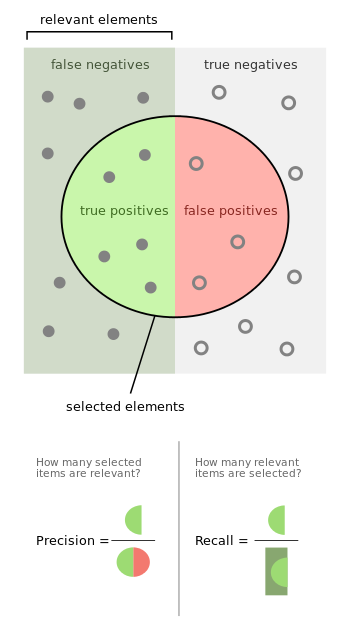 .

**Кросс-валидация**

Иногда просто разбиение на обучающую и тестовую выборки не даёт точного прогноза оценки ошибки, ведь обученный алгоритм может сильно меняться в зависимости от обучающей выборки. Чтобы нивелировать эффект конкретной обучающей выборки, используют так называему кросс-валидацию. Идея кросс-валидации состоит в том, чтобы разбить все данные на несколько одинаковых по размеру частей, поочерёдно используя каждую часть как test, а оставшийся датасет --- как train. На каждом из экспериментов вычисляют тестовую ошибку, затем результат усредняют по всем экспериментам.

![alt text](https://drive.google.com/uc?id=1cS2AoSrcG5sCGbnKhkv3ZYqKSmtPd-XM)

Кросс-валидация находится в модуле sklearn.model_selection.

Точность - случайный лес : 79.85%
Перекрестная валидация оценки для случайного леса: 83.15


Text(0.5, 1.05, 'Перекрестная матрица для случайного леса')

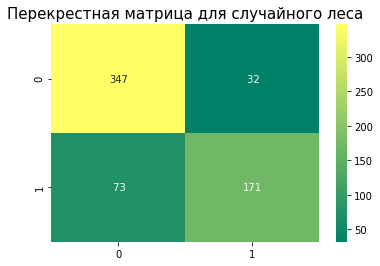

In [124]:
clf = RandomForestClassifier(criterion='entropy',
n_estimators=700,
min_samples_split=10,
min_samples_leaf=1,
max_features='auto',
oob_score=True,
random_state=1,
n_jobs=-1)
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.3)
clf.fit(x_train, np.ravel(y_train))
print("Точность - случайный лес : "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")
result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('Перекрестная валидация оценки для случайного леса:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Перекрестная матрица для случайного леса', y=1.05, size=15)

##Гауссовский Наивный Байесовский классификатор

In [131]:
from sklearn.naive_bayes import GaussianNB

Точность Гауссовского метода: 46.64%
Перекрестная кросс валидация для Гауссовского метода: 39.16


Text(0.5, 1.05, 'Перекрестная матрица для Гауссовского метода:')

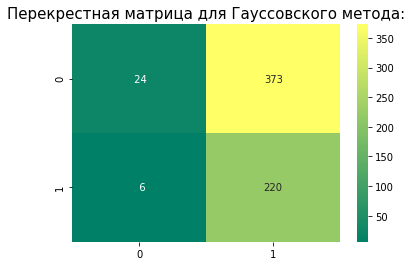

In [132]:
clf = GaussianNB()
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.3)
clf.fit(x_train, np.ravel(y_train))
print("Точность Гауссовского метода: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")
result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('Перекрестная кросс валидация для Гауссовского метода:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Перекрестная матрица для Гауссовского метода:', y=1.05, size=15)

##ROC-AUC

In [133]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000).fit(x_train, y_train)

In [134]:
y_train_proba = model.predict_proba(x_train)[:, 1]
y_test_proba = model.predict_proba(x_test)[:, 1]

In [135]:
from sklearn.metrics import roc_curve, roc_auc_score

Train roc-auc: 0.886527273132565
Test roc-auc: 0.8715970961887478


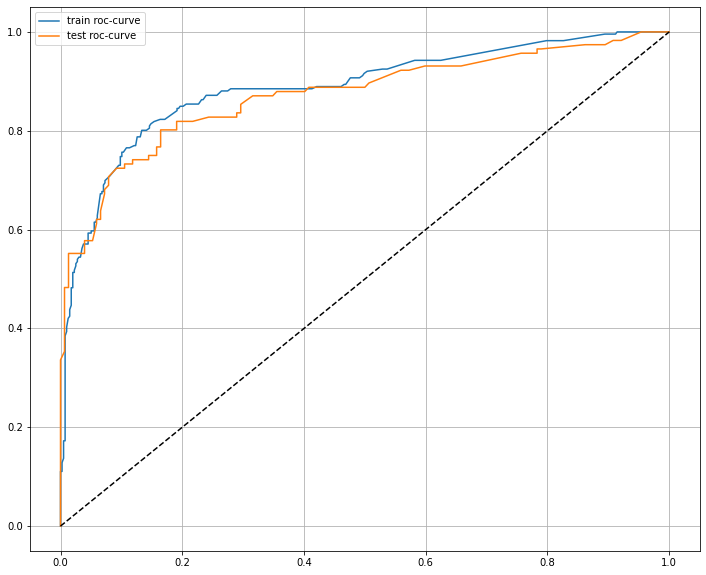

In [136]:
plt.figure(figsize=(12,10))

print(f'Train roc-auc: {roc_auc_score(y_train, y_train_proba)}')
print(f'Test roc-auc: {roc_auc_score(y_test, y_test_proba)}')


plt.plot(*roc_curve(y_train, y_train_proba)[:2], label='train roc-curve')
plt.plot(*roc_curve(y_test, y_test_proba)[:2], label='test roc-curve')

plt.plot([0,1], [0,1], linestyle='--', color='black')
plt.grid(True)
plt.legend()
plt.show()

### Задание 6 (1 балл)
Добавьте в модель два новых сгенерированных признака. Если нужно, добавьте признаки, сгенерированные ohe-hot кодированием. Обучите ту же самую модель на расширенном множестве признаков. Улучшилось ли качество предсказания на кросс-валидации?

## Дополнительное моделирование
### Задание 7 (2 балла)
Теперь более серьёзно подойдём к моделированию. Попробуйте несколько алгоритмов из тех, что мы проходили в курсе. Вам помогут ноутбуки с линейными алгоритмами и выбором модели. Хотя бы для одного алгоритма проведите подбор оптимального гиперпараметра. 

Train roc-auc: 0.886527273132565
Test roc-auc: 0.8715970961887478


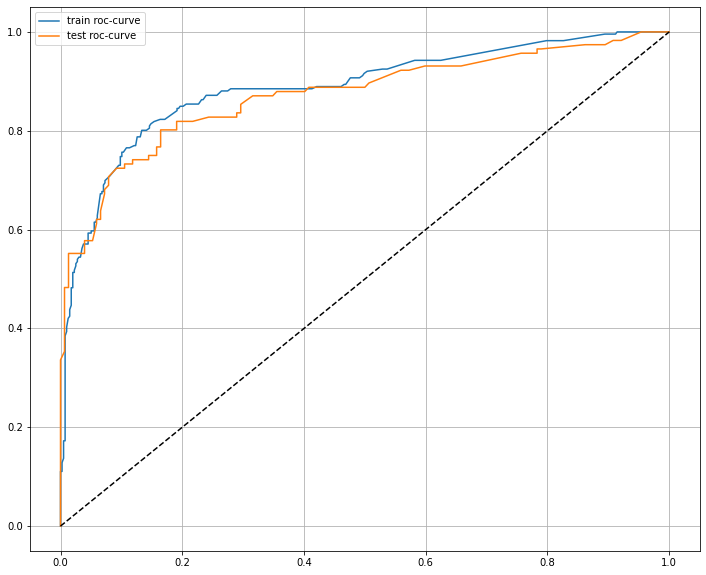

In [145]:
model = LogisticRegression(max_iter=200).fit(x_train, y_train)
#изменяя max_iter (норма при наказании) точность не изменяется

y_train_proba = model.predict_proba(x_train)[:, 1]
y_test_proba = model.predict_proba(x_test)[:, 1]

plt.figure(figsize=(12,10))

print(f'Train roc-auc: {roc_auc_score(y_train, y_train_proba)}')
print(f'Test roc-auc: {roc_auc_score(y_test, y_test_proba)}')


plt.plot(*roc_curve(y_train, y_train_proba)[:2], label='train roc-curve')
plt.plot(*roc_curve(y_test, y_test_proba)[:2], label='test roc-curve')

plt.plot([0,1], [0,1], linestyle='--', color='black')
plt.grid(True)
plt.legend()
plt.show()

## Результаты моделирования

### Задание 8 (1 балл)
Измерьте качество итоговой модели на кросс-валидации. Выполните предсказание на тестовом множестве и сохраните их в переменную ``y_test``. Измерьте итоговое качество на тестовом множестве.

## Выводы
### Задание 9 (3 балла)
Сделайте выводы. Какие из идей сработали? Какие оказались лишними?